<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Optical Flow

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab.patches import cv2_imshow

#### Importing video

In [2]:
v1 = "/content/slow_traffic_small.mp4" # traffic video

In [3]:
v2 = "/content/vtest.avi" # people-walking video

In [4]:
r = "/content/record.mp4" # self-recorded video (included along with this notebook)

#### A. Lucas-Kanade

In [40]:
def LucasK(video):
    cap = cv2.VideoCapture(video)

    # params for ShiTomasi corner detection
    feature_params = dict( maxCorners = 100,
                          qualityLevel = 0.3,
                          minDistance = 7,
                          blockSize = 7 )
    
    # Parameters for lucas kanade optical flow
    lk_params = dict( winSize  = (15, 15), #window size
                      maxLevel = 2,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
    
    # Create some random colors
    color = np.random.randint(0, 255, (100, 3))

    # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

    # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)

    counter=0

    while(1):
        ret, frame = cap.read()
        if not ret:
            # print('No frames grabbed!')
            break
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # optical flow function
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        # Select good points
        if p1 is not None:
            good_new = p1[st==1]
            good_old = p0[st==1]

        # draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        img = cv2.add(frame, mask)

        if (counter==0 or counter==70):
            print("Frame ",counter+1)
            cv2_imshow(img) #print the first and 10th frame
        counter+=1
        # Now update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)
    
    print("Frame ",counter+1)
    cv2_imshow(img) #print the last frame
    print("No. of frames: ",counter+1)

Sample video 1

Frame  1


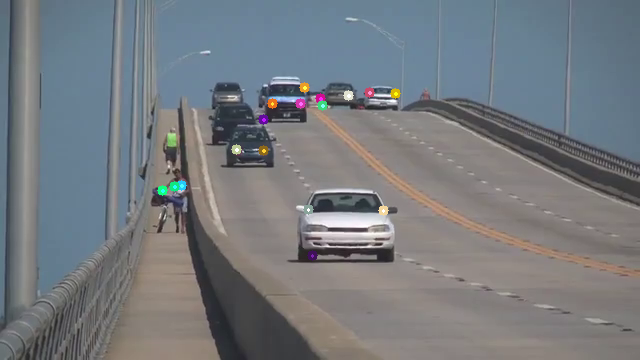

Frame  71


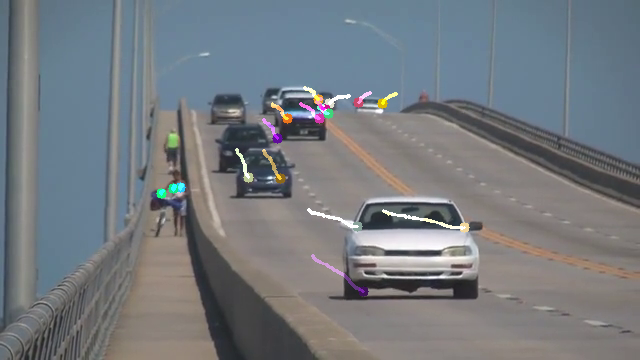

Frame  914


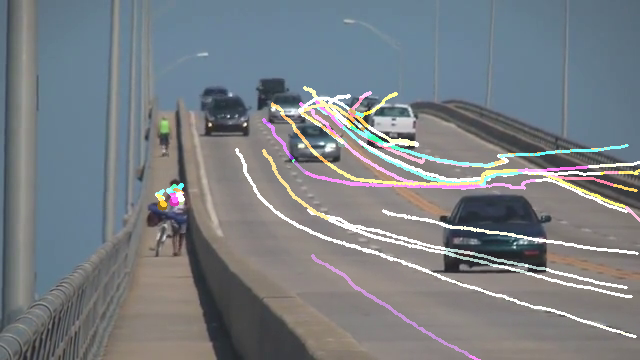

No. of frames:  914


In [41]:
LucasK(v1)

Sample video 2

Frame  1


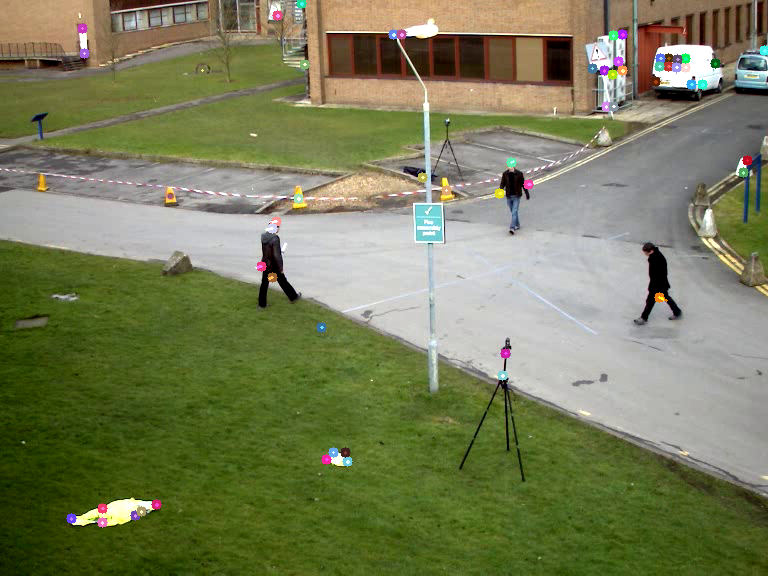

Frame  71


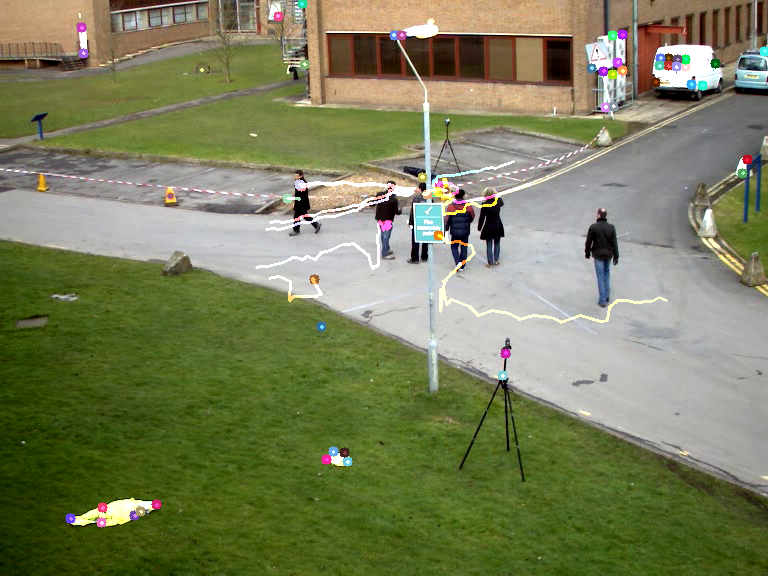

Frame  795


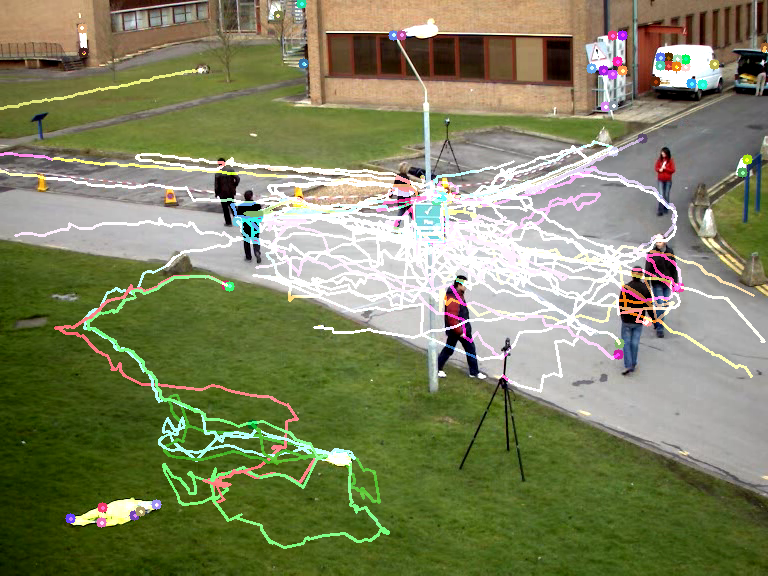

No. of frames:  795


In [42]:
LucasK(v2)

Recorded video 

Frame  1


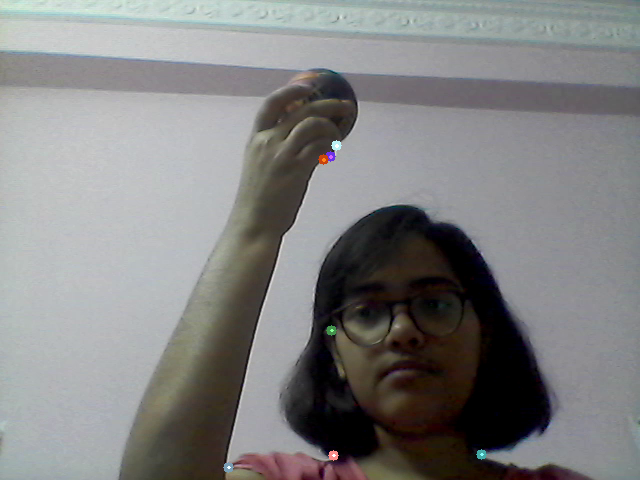

Frame  71


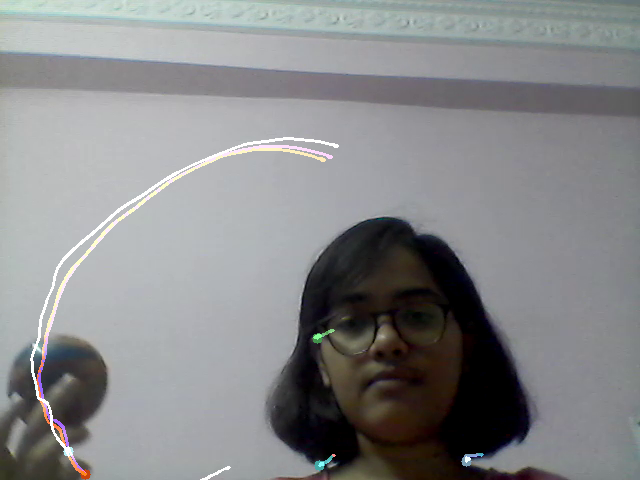

Frame  144


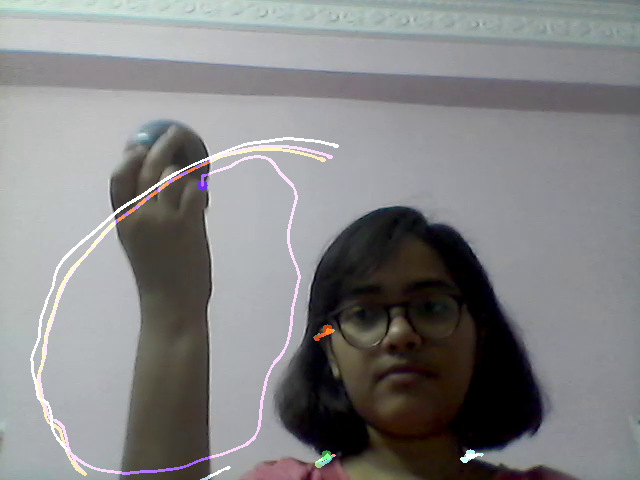

No. of frames:  144


In [43]:
LucasK(r)

#### B. Horn Schunck

In [44]:
def HornSch(video):
    cap = cv2.VideoCapture(video)
    ret, frame1 = cap.read()
    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[..., 1] = 255

    counter = 0

    while(1):
        ret, frame2 = cap.read()
        if not ret:
            # print('No frames grabbed!')
            break
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        # Horn Schunck function
        flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hsv[..., 0] = ang*180/np.pi/2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        
        if (counter==0 or counter==70):
            print("Frame ",counter+1)
            cv2_imshow(bgr) #print the first and 10th frame
        counter+=1

        prvs = next

    print("Frame ",counter+1)
    cv2_imshow(bgr) #print the last frame
    print("No. of frames: ",counter+1)

Sample video 1

Frame  1


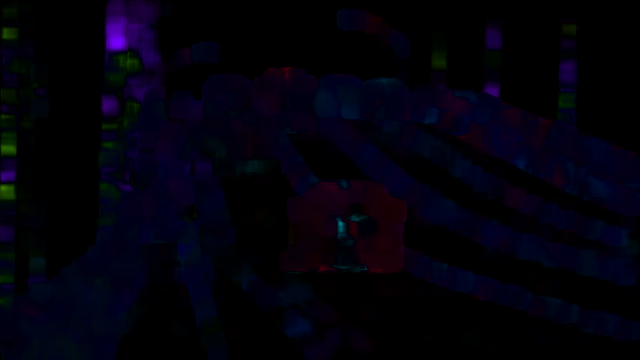

Frame  71


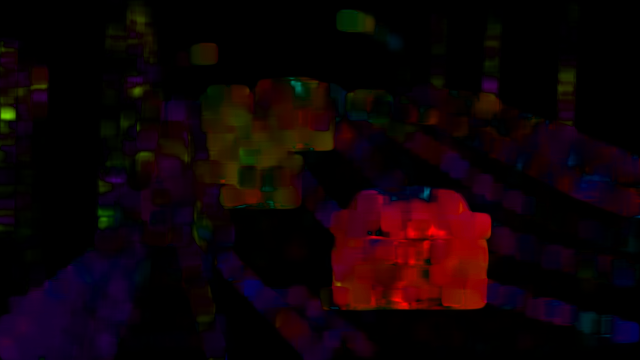

Frame  914


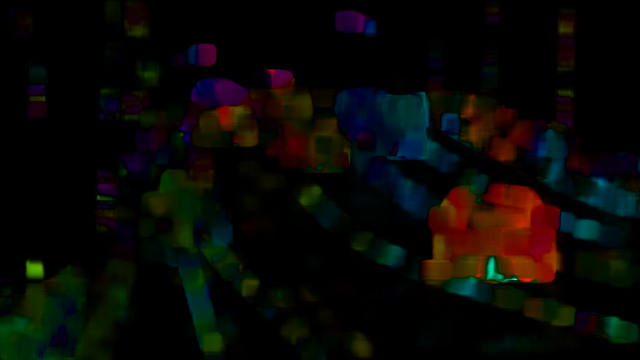

No. of frames:  914


In [45]:
HornSch(v1)

Sample video 2

Frame  1


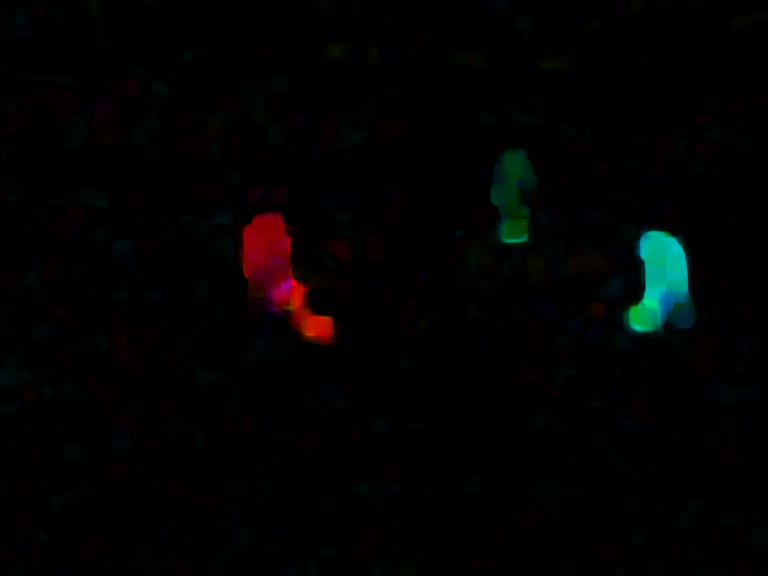

Frame  71


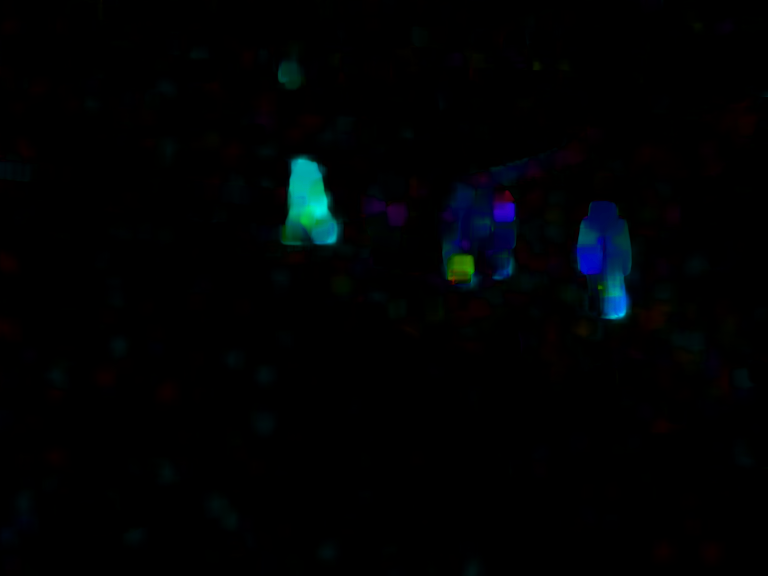

Frame  795


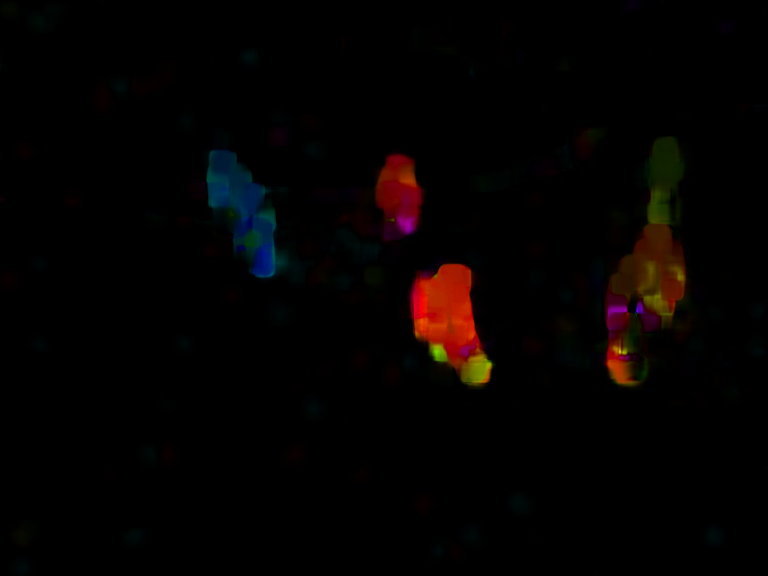

No. of frames:  795


In [46]:
HornSch(v2)

Recorded video 

Frame  1


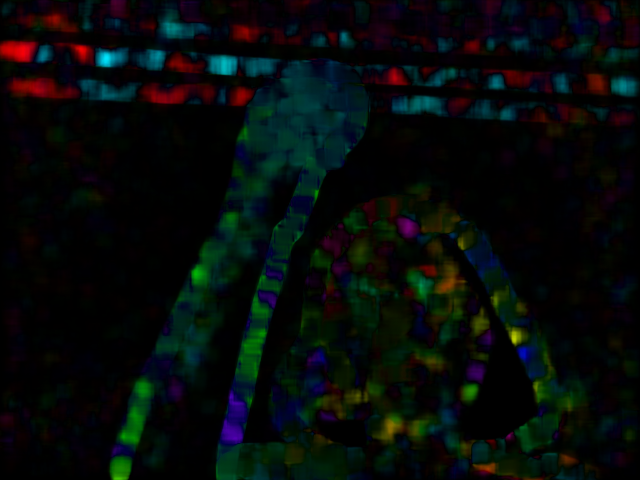

Frame  71


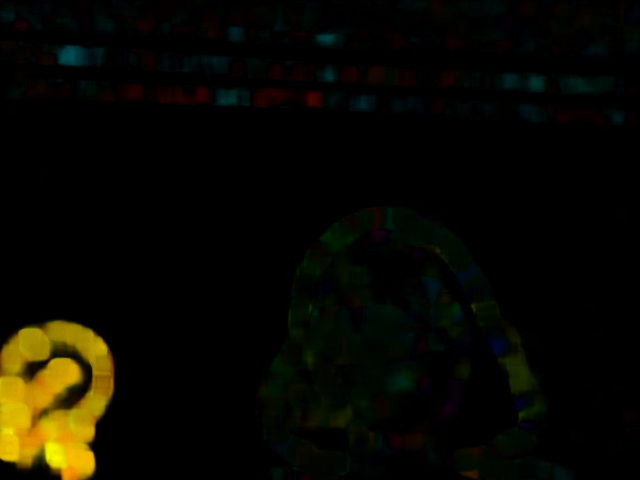

Frame  144


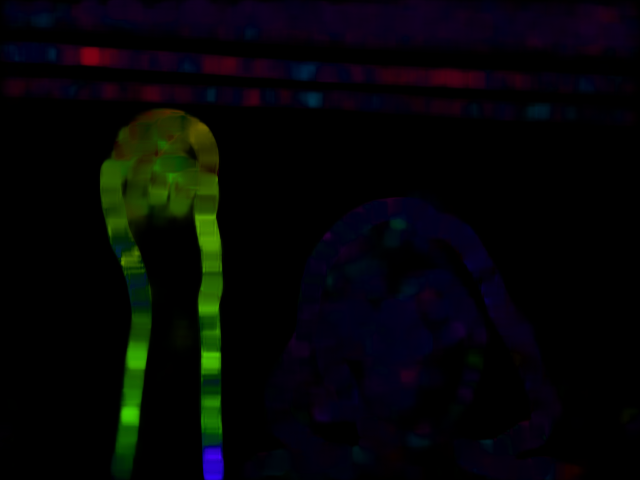

No. of frames:  144


In [47]:
HornSch(r)

#### Observation
1. It is observed that the Lucas-Kanade output traces out the path of the moving objects by applying a localized function, and though we see the clear trajectory of the hand movement in the 3rd video, and the cars in the 1st video, the 2nd video has a relatively haphazard output and it is uncertain where which person has moved, due to the large number of persons taking different routes throughout the video.

2. Horn-Schunck gives the global heat map of the objects moving in a frame and highlights them. Though its clear which object is moving, the trajectory of the object isn't as clear as in Lucas-Kanade. It is able to track the ball and hand movement in the 3rd video, as well as the people and the traffic in the 1st and 2nd videos respectively.

References
1. [Optical Flow](https://docs.opencv.org/3.4/d4/dee/tutorial_optical_flow.html)